# 11wk-1: Choropleth (folium)

최규빈  
2023-11-13

<a href="https://colab.research.google.com/github/guebin/DV2023/blob/main/posts/11wk-1.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상

<https://youtu.be/playlist?list=PLQqh36zP38-xEE-fHVY3jvVBROgkGI2jH&si=wqJ8ZUzbI8LeuVYo>

# 2. Imports

In [1]:
# !pip install folium

In [2]:
import numpy as np
import pandas as pd
#---#
import folium 
import json 
import requests 

# 3. Dictionary: view vs copy

`-` 원하지 않는 코드

In [3]:
dct1 = {'a':1, 'b':2, 'c':3}
dct1

In [4]:
dct2 = dct1 # 복사를 함...

In [5]:
dct1, dct2

In [6]:
dct2['c'] = 999 

In [7]:
dct1, dct2

`-` 원하는 코드

In [8]:
dct1 = {'a':1, 'b':2, 'c':3}
dct1

In [9]:
dct2 = dct1.copy() # 복사를 함...

In [10]:
dct1, dct2

In [11]:
dct2['c'] = 999 

In [12]:
dct1, dct2

***혹시 좀 더 자세한 내용이 궁금하다면 아래를 참고하세요!!!***

> <https://guebin.github.io/PP2023/posts/2023-06-21-13wk-1.html>

# 4. [Choropleth map](https://en.wikipedia.org/wiki/Choropleth_map)

`-` 코로플레스 맵의 예시

<figure>
<img
src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e1/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EC%A0%9C21%EB%8C%80_%EA%B5%AD%ED%9A%8C%EC%9D%98%EC%9B%90_%EC%84%A0%EA%B1%B0_%EA%B2%B0%EA%B3%BC.svg/1280px-%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EC%A0%9C21%EB%8C%80_%EA%B5%AD%ED%9A%8C%EC%9D%98%EC%9B%90_%EC%84%A0%EA%B1%B0_%EA%B2%B0%EA%B3%BC.svg.png"
alt="2020년 대한민국 총선결과, 출처(https://ko.wikipedia.org/wiki/대한민국_제21대_국회의원_선거).)" />
<figcaption aria-hidden="true">2020년 대한민국 총선결과, 출처(<a
href="https://ko.wikipedia.org/wiki/대한민국_제21대_국회의원_선거"
class="uri">https://ko.wikipedia.org/wiki/대한민국_제21대_국회의원_선거</a>).)</figcaption>
</figure>

`-` 대충 정의하면, coropleth = polygon + y 이라고 볼 수 있다.

-   `polygon`은 지리적구역을 표현
-   `y`는 해당지리적 구역에 대응하는 측정값

# 5. `folium` 기본

`-` 개념

-   Map Object를 생성 (fig 생성)
-   Map Object에 이것저것 추가 (geom 추가)

## A. `folium.Map()`

`# 예시1` – 기본, scrollWheelZoom

In [13]:
m = folium.Map(
    scrollWheelZoom = False
)
m

`#`

`# 예시2` – location, zoom_start

In [14]:
m = folium.Map(
    scrollWheelZoom = False,
    location = [36,127],
    zoom_start=6
)
m

`#`

`# 예시3` – 전북대학교 분수대

`-` `location`은 구글맵스에서 분수대 좌표를 확인할 것

-   <https://www.google.co.kr/maps/>
-   \[35.8468, 127.1294\] 정도..?

`-` `zoom_start=18` 로 설정할 것

In [15]:
m = folium.Map(
    scrollWheelZoom = False,
    location = [35.8468, 127.1294],# 전북대학교 분수대의 좌표를 확인하여 입력
    zoom_start=18
)
m

`#`

## B. `folium.Marker()`

`# 예제1` – `Map`에 `Marker`를 추가

`1`. `Map`의 인스턴스와 `Marker`의 인스턴스를 각각 생성

In [16]:
m = folium.Map(
    scrollWheelZoom = False,
    location = [35.8468,127.1294],
    zoom_start=18
)

In [17]:
marker = folium.Marker(
    location = [35.8468,127.1294]
)

`2`. 현재는 `Map` 인스턴스에 `Marker` 인스턴스가 표시되어있지 않음

In [18]:
m

`3`. `Marker` 인스턴스를 `Map`에 추가함

In [19]:
marker.add_to(m)

`4`. 이제는 `Map` 인스턴스에 `Marker` 인스턴스가 `add_to` 되어서 함께
표시됨

In [20]:
m

`#`

`# 예제2` – 통계학과 대학원생의 산책경로

통계학과 대학원생의 산책로를 마커로 표시하라. 산책경로는 아래와 같다고
하자.

``` python
## 통계학과 대학원생의 산책경로..
[35.8471, 127.1291]
[35.8468, 127.1289]
[35.84635, 127.1291]
[35.84635, 127.1297]
[35.8468, 127.12995]
[35.8474, 127.1300]
```

In [21]:
m = folium.Map(
    scrollWheelZoom = False,
    location = [35.8468,127.1294], zoom_start=18
)
folium.Marker(
    location = [35.8471, 127.1291]
).add_to(m)
folium.Marker(
    location = [35.8468, 127.1289]
).add_to(m)
folium.Marker(
    location = [35.84635, 127.1291]
).add_to(m)
folium.Marker(
    location = [35.84635, 127.1297]
).add_to(m)
folium.Marker(
    location = [35.8468, 127.12995]
).add_to(m)
folium.Marker(
    location = [35.8474, 127.1300]
).add_to(m)
m

`#`

## C. `folium.Polygon`

`# 예제1` – 통계학과 대학원생의 산책경로를 폴리곤으로 표시 (더블리스트)

In [22]:
m = folium.Map(
    scrollWheelZoom = False,
    location = [35.8468,127.1294], zoom_start=18
)
folium.Polygon(
    locations = [[35.8471, 127.1291],
                 [35.8468, 127.1289],
                 [35.84635, 127.1291],
                 [35.84635, 127.1297],
                 [35.8468, 127.12995],
                 [35.8474, 127.1300]]
).add_to(m)
m

`#`

`# 예제2` – 2개의 폴리곤으로 표시 (3중리스트)

In [23]:
poly = np.array([[35.8471, 127.1291],
                 [35.8468, 127.1289],
                 [35.84635, 127.1291],
                 [35.84635, 127.1297],
                 [35.8468, 127.12995],
                 [35.8474, 127.1300]])

In [24]:
lat, lon = poly.T

In [25]:
poly2 = np.stack([lat, lon + 0.0011],axis=1)
poly2

In [26]:
np.stack([poly,poly2],axis=0)

In [27]:
m = folium.Map(
    scrollWheelZoom = False,
    location = [35.8468,127.1294], zoom_start=18
)
folium.Polygon(
    locations = np.stack([poly,poly2],axis=0)
).add_to(m)
m

> 아이디어: 이걸 잘 이용하면 코로플레스맵처럼 지도를 행정구열별로 나눌
> 수 있겠음. 그런데, 실제 구현하려면 엄청난 노가다를 해야할 것으로
> 생각됨 –\> 누군가 해놓지 않았을까??

`#`

> axis를 설정하는 방법을 다시 공부하고 싶다면
> <https://guebin.github.io/PP2023/posts/02_DataScience/2023-04-12-6wk-2.html#넘파이-공부-4단계-축>
> 을 참고하세요!

# 6. South Korea github

## A. github 소개

`-` github account: southkorea

-   `southkorea` 라는 깃헙유저가 있음.
-   <https://github.com/southkorea>

`-` repo: southkorea-maps

-   `southkorea`라는 깃헙유저는 `southkorea-maps`이라는 저장소를 가지고
    있음.
-   <https://github.com/southkorea/southkorea-maps>

`-` 저장소 `https://github.com/southkorea/southkorea-maps` 에는
`kostat/2028/json/`이라는 폴더가 있으며 여기에는 아래의 파일들이 있음.

    skorea-municipalities-2018-geo.json # <-- 이 파일에 관심있음. 
    skorea-municipalities-2018-topo-simple.json
    skorea-municipalities-2018-topo.json
    skorea-provinces-2018-geo.json # <-- 이 파일에 관심있음.
    skorea-provinces-2018-topo-simple.json
    skorea-provinces-2018-topo.json
    skorea-submunicipalities-2018-geo.json
    skorea-submunicipalities-2018-topo-simple.json
    skorea-submunicipalities-2018-topo.json

이중에서 우리는 아래의 두 파일에 관심있음.

    skorea-municipalities-2018-geo.json 
    skorea-provinces-2018-geo.json 

`-` 이 파일들에는 행정구역을 의미하는 폴리곤을 누군가가 정리해둠!!

## B. json 파일 다운로드

In [28]:
global_dict = json.loads(requests.get('https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2018/json/skorea-provinces-2018-geo.json').text)
local_dict = json.loads(requests.get('https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2018/json/skorea-municipalities-2018-geo.json').text)

## C. json 파일의 구조

`-` global_dict의 구조를 살펴보면 아래와 같음

| level_0  |       level_1       |  level_2   |             level3              |      level4       |
|:--------:|:-------------------:|:----------:|:-------------------------------:|:-----------------:|
|   type   | ‘FeatureCollection’ |            |                                 |                   |
| features |        \[0\]        |    type    |            ‘Feature’            |                   |
|          |                     |  geometry  |              type               |     ‘Polygon’     |
|          |                     |            |           coordinates           |  (1,`??`,2) list  |
|          |                     | properties |              name               |   ‘서울특별시’    |
|          |                     |            |            base_year            |      ‘2018’       |
|          |                     |            |            name_eng             |      ‘Seoul’      |
|          |                     |            |              code               |       ‘11’        |
|          |          …          |     …      |                …                |         …         |
|          |       \[16\]        |    type    |            ‘Feature’            |                   |
|          |                     |  geometry  |              type               |  ‘MultiPolygon’   |
|          |                     |            |           coordinates           | (6,1,`??`,2) list |
|          |                     | properties |              name               | ‘’제주특별자치도’ |
|          |                     |            |            base_year            |      ‘2018’       |
|          |                     |            |            name_eng             |     ‘Jeju-do’     |
|          |                     |            |              code               |       ‘39’        |
|   name   |       ‘sido’        |            |                                 |                   |
|   crs    |        type         |   ‘name’   |                                 |                   |
|          |     properties      |    name    | ‘urn:ogc:def:crs:OGC:1.3:CRS84’ |                   |

`-` local_dict의 구조를 살펴보면 아래와 같음

| level_0  |       level_1       |  level_2   |             level3              |       level4       |
|:--------:|:-------------------:|:----------:|:-------------------------------:|:------------------:|
|   type   | ‘FeatureCollection’ |            |                                 |                    |
| features |        \[0\]        |    type    |            ‘Feature’            |                    |
|          |                     |  geometry  |              type               |   ‘MultiPolygon’   |
|          |                     |            |           coordinates           | (1,1,`??`,2) list  |
|          |                     | properties |              name               |      ‘종로구’      |
|          |                     |            |            base_year            |       ‘2018’       |
|          |                     |            |            name_eng             |    ‘Jongno-gu’     |
|          |                     |            |              code               |      ‘11010’       |
|          |          …          |     …      |                …                |         …          |
|          |       \[249\]       |    type    |            ‘Feature’            |                    |
|          |                     |  geometry  |              type               |   ‘MultiPolygon’   |
|          |                     |            |           coordinates           | (10,1,`??`,2) list |
|          |                     | properties |              name               |     ‘서귀포시’     |
|          |                     |            |            base_year            |       ‘2018’       |
|          |                     |            |            name_eng             |   ‘Seogwipo-si’    |
|          |                     |            |              code               |      ‘39020’       |
|   name   |       ‘sido’        |            |                                 |                    |
|   crs    |        type         |   ‘name’   |                                 |                    |
|          |     properties      |    name    | ‘urn:ogc:def:crs:OGC:1.3:CRS84’ |                    |

`-` 포인트는 여기에 있음

In [29]:
poly = np.array(global_dict['features'][0]['geometry']['coordinates'])[0]
lon, lat = poly.T 
np.stack([lat,lon],axis=1)

`-` 서울의다각형을 의미하는것 같음. –\> 확인해보자.

In [30]:
m = folium.Map(
    location = [37.55,127], 
    zoom_start=11,
    scrollWheelZoom = False
)
folium.Polygon(
    locations= np.stack([lat,lon],axis=1),
    fill=True
).add_to(m)
m

> 일상언어에서는 (lat,lon) 순서로 표현한다. 즉 적도를 기준으로 얼마나
> 위/아래로 있는지, 그리고 그리니치천문대를 기준으로 얼마나 동/서로
> 있는지를 표현한다. 그런데 lat이 y축의 느낌을 가지고 lon이 x축의 느낌을
> 가지는데 (lat,lon) 순으로 좌표를 선택하면 컴퓨터로 표현하기에 종종
> 헷갈릴 수 있다. 그래서 어떤 경우는 (lon,lat) 순서로 좌표를 정리하기도
> 한다.

# 7. `folium.Choropleth` 를 이용한 시각화

## A. `folium.Choropleth` 소개

`-` `folium.Choropleth` 은 아래와 같은 방식으로 그림을 그린다고 생각하면
편리하다. (실제로 이런지는 모르겠음.. 아마 그럴거에요..)

1.  `json` 파일을 바탕으로 폴리곤을 그린다. 폴리곤에 이름을 붙인다.
2.  `df = [폴리곤의이름, 통계값(y)]`와 같은 형식으로 정리된
    데이터프레임을 바탕으로, 각 폴리곤에 대응하는 `y`값을 색깔로
    맵핑한다.

`-` 포인트: 2개의 정보를 이용하네?

## B. Polygon 시각화

`# 예제1` – 전국의 행정구역 시각화 (global)

In [31]:
m = folium.Map(
    location = [36,128],
    zoom_start = 7,
    scrollWheelZoom= False
)
folium.Choropleth(
    geo_data=global_dict
).add_to(m)
m

`#`

`# 예제2` – 전국의 행정구역 시각화 (local)

In [32]:
m = folium.Map(
    location = [36,128],
    zoom_start = 7,
    scrollWheelZoom= False
)
folium.Choropleth(
    geo_data=local_dict
).add_to(m)
m

`#`

`# 예제3` – 전국의 행정구역 시각화 (덕진구/완산구)

In [33]:
jeonju_dict = local_dict.copy() 

In [34]:
jeonju_dict['features'] = [l for l in local_dict['features'] if '전주시' in l['properties']['name']]

In [35]:
m = folium.Map(
    location = [35.84195368311022, 127.1155556693179],
    zoom_start=11,
    scrollWheelZoom = False
)
folium.Choropleth(
    geo_data=jeonju_dict
).add_to(m)
m

`#`

## C. (Polygon, Value) 시각화 ($\star\star\star$)

`# 예제1` – 덕진구 vs 완산구

덕진구와 완산구의 전기사용량이 아래와 같이 정리되었다고 하자.

In [36]:
df = pd.DataFrame({
    'key':['전주시덕진구', '전주시완산구'], 
    'elec_use':[20,30]
})
df

이 전기사용량을 각 덕진구/완산구 각각의 polygon의 색깔로 구분할 수
있을까?

**(선실습)**

In [37]:
jeonju_dict['features'][0]['properties']['name']

In [38]:
m = folium.Map(
    location = [35.84195368311022, 127.1155556693179],
    zoom_start=11,
    scrollWheelZoom = False
)
folium.Choropleth(
    geo_data= jeonju_dict,
    key_on='properties.name',
    data=df,
    columns=['key','elec_use']
).add_to(m)
m

**(후설명)**

-   이해를 위해 필요한 약간의 직관
    -   예비생각1: 코로플레스맵을 그리기 위해서는 항상 2개의 데이터를
        연결해야하는 구조이다.
    -   예비생각2: 두개의 데이터를 연결하기 위해서는 공유가능한 연결의
        매개체가 필요하다. (`좌우로 concat`: row-index를 공유,
        `위아래로concat`: colnames공유, `merge`: 양쪽 데이터프레임에서
        같은 이름을 가진 특정 col이 있었음)
    -   예비생각3: 코로플레스맵의 연결매개체는 ‘완산구’, ’덕진구’와 같은
        지역명이다.
-   `folium.Choropleth()` 에 사용될 변수들 상상해보기
    -   재료: 두개의 데이터 `geo_data = json`과
        `data = df[다각형의 인덱스, 통계값]`를 를 명시해야한다.
    -   연결매개체: 두개의 데이터프레임을 연결하는 변수이름 (`key_on`)을
        명시해야 한다.

`#`

`# 예제2` – 덕진구 vs 완산구 / `key_on`에 대한 이해를 위해 만든 억지예제

덕진구와 완산구의 전기사용량이 아래와 같이 정리되었다고 하자.

In [39]:
df = pd.DataFrame({
    'key':['전주시덕진구', 'Jeonjusiwansangu'], 
    'elec_use':[20,30]
})
df

이 전기사용량을 각 덕진구/완산구 각각의 polygon의 색깔로 구분할 수
있을까?

`-` 예시1: ‘properties.name’ 으로 `key_on`.

In [40]:
jeonju_dict['features'][0]['properties'],jeonju_dict['features'][1]['properties']

In [41]:
m = folium.Map(
    location = [35.84195368311022, 127.1155556693179],
    zoom_start=11,
    scrollWheelZoom = False
)
folium.Choropleth(
    geo_data= jeonju_dict,
    key_on='properties.name',
    data=df,
    columns=['key','elec_use']
).add_to(m)
m

`-` 예시2: ‘properties.name_eng’ 으로 `key_on`.

In [42]:
jeonju_dict['features'][0]['properties'],jeonju_dict['features'][1]['properties']

In [43]:
m = folium.Map(
    location = [35.84195368311022, 127.1155556693179],
    zoom_start=11,
    scrollWheelZoom = False
)
folium.Choropleth(
    geo_data= jeonju_dict,
    key_on='properties.name_eng',
    data=df,
    columns=['key','elec_use']
).add_to(m)
m

`-` 예시3: ’code’열을 새롭게 할당하고 ’code’열로 `key_on`

In [44]:
jeonju_dict['features'][0]['properties'],jeonju_dict['features'][1]['properties']

In [45]:
df.assign(code = ['35012','35011'])

In [46]:
m = folium.Map(
    location = [35.84195368311022, 127.1155556693179],
    zoom_start=11,
    scrollWheelZoom = False
)
folium.Choropleth(
    geo_data= jeonju_dict,
    key_on='properties.code',
    data=df.assign(code = ['35012','35011']),
    columns=['code','elec_use']
).add_to(m)
m

`#`

`# 예제4` – 대한민국 인구수 시각화 (global)

In [47]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/2021-11-22-prov.csv')
df

In [48]:
m = folium.Map(
    location = [36,128],
    zoom_start=7,
    scrollWheelZoom = False
)
folium.Choropleth(
    geo_data=global_dict,
    key_on='properties.name',
    data = df,
    columns = ['행정구역(시군구)별','총인구수 (명)']
).add_to(m)
m

`#`

`# 예제5` – 대한민국 인구수 시각화 (local)

In [49]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/2021-11-22-muni.csv')
df

In [50]:
df.loc[67:71]

In [51]:
m = folium.Map(
    location = [36,128],
    zoom_start=7,
    scrollWheelZoom = False
)
folium.Choropleth(
    geo_data=local_dict,
    key_on='properties.name',
    data = df,
    columns = ['행정구역(시군구)별','총인구수 (명)']
).add_to(m)
m

`#`

# 8. HW

대전의 인구수를 choropleth map을 이용하여 구별로 시각화 하고 결과를
화면캡쳐 후 제출하라.

1.  아래를 `geo_data`로 이용할것

In [52]:
local_dict = json.loads(requests.get('https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2018/json/skorea-municipalities-2018-geo.json').text)
daejeon_dict = local_dict.copy() 
daejeon_dict['features'] = [l for l in local_dict['features'] if l['properties']['code'][:2] == '25']

1.  아래를 data로 이용할 것

In [53]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/2021-11-22-muni.csv')[67:72].reset_index(drop=True)
df

**hint**

-   대전의 (위도,경도)는 (36.34913,127.3849) 임.

**시각화예시**

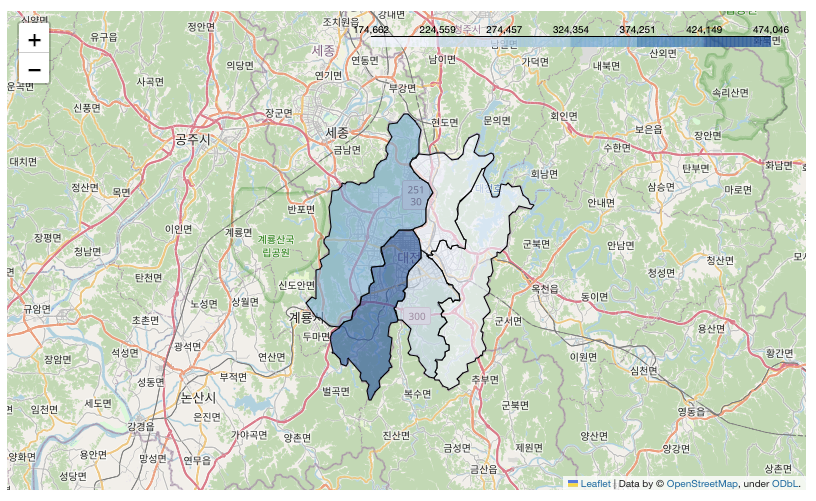